In [7]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
import osmnx as ox
import geopandas as gpd
import networkx as nx

In [5]:
!pip3 install pyrosm
from pyrosm import OSM, get_data
import osmnx as ox



You should consider upgrading via the '/Users/paul.carroll/newenv/bin/python3 -m pip install --upgrade pip' command.
Downloaded Protobuf data 'Cambridge.osm.pbf' (6.41 MB) to:
'/var/folders/91/dh1v62bs23d450jv1db1d1h40000gp/T/pyrosm/Cambridge.osm.pbf'


In [ ]:

# Get all walkable roads and the nodes 

osmCambridge = OSM(get_data("Cambridge"))
nodes, edges = osmCambridge.get_network(nodes=True)

In [6]:
G = osmCambridge.to_graph(nodes, edges, graph_type="networkx")

In [9]:
source_address1 = "39 Kings Hedges Road, Cambridge"
source_address2 = "6 High Cross, Cambridge"
source_address3 = "132 Church End, Cambridge"
source_address4 = "11 Leonard Close, Cambridge"
target_address = "Hills Road, Cambridge"

source1 = ox.geocode(source_address1)
source2 = ox.geocode(source_address2)
source3 = ox.geocode(source_address3)
source4 = ox.geocode(source_address4)
target = ox.geocode(target_address)

In [10]:
source_node1 = ox.get_nearest_node(G, source1)
source_node2 = ox.get_nearest_node(G, source2)
source_node3 = ox.get_nearest_node(G, source3)
source_node4 = ox.get_nearest_node(G, source4)

target_node = ox.get_nearest_node(G, target)

In [11]:
route1 = nx.shortest_path(G, source_node1, target_node, weight="length")
route2 = nx.shortest_path(G, source_node2, target_node, weight="length")
route3 = nx.shortest_path(G, source_node3, target_node, weight="length")
route4 = nx.shortest_path(G, source_node4, target_node, weight="length")

In [12]:
routes = [route1, route2, route3, route4]
#rc = ['r','y','c','g']
rc1 = ['r'] * (len(route1) - 1)
rc2 = ['b'] * len(route2)
rc3 = ['y'] * len(route3)
rc4 = ['g'] * len(route4)
rc = rc1 + rc2 + rc3 +rc4

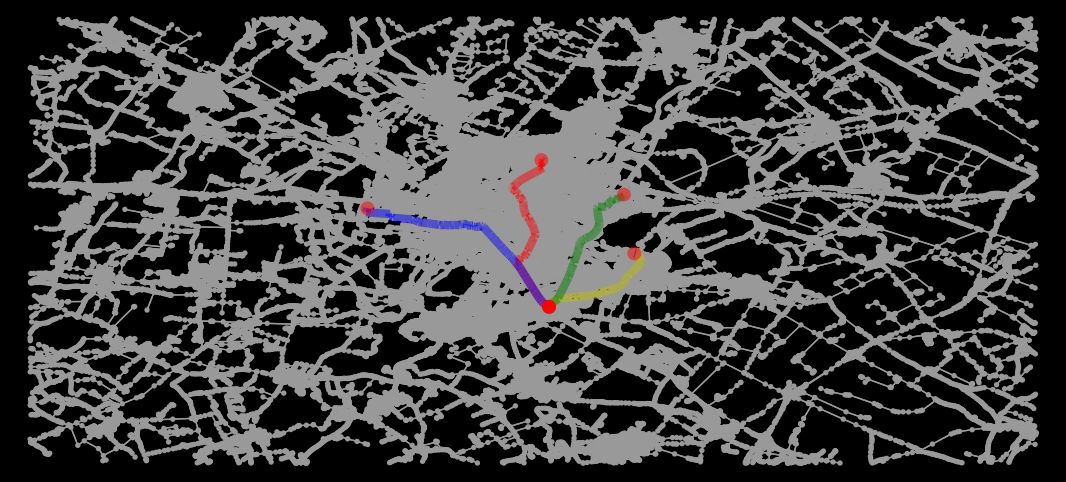

In [13]:
fig, ax = ox.plot_graph_routes(G, routes, route_color=rc, route_linewidth=6, bgcolor='k')

In [14]:
length1 = nx.shortest_path_length(G, source=source_node1, target=target_node, weight='length')
length2 = nx.shortest_path_length(G, source=source_node2, target=target_node, weight='length')
length3 = nx.shortest_path_length(G, source=source_node3, target=target_node, weight='length')
length4 = nx.shortest_path_length(G, source=source_node4, target=target_node, weight='length')

In [17]:
print('route1 length', round(length1,2))
print('route2 length', round(length2,2))
print('route3 length', round(length3,2))
print('route4 length', round(length4,2))


route1 length 6918.1
route2 length 6993.71
route3 length 3587.01
route4 length 5339.96
